In [ ]:
import pandas as pd # инструмент для работы с большими данными
import numpy as np # инструмент для работы с математическими структурами
import matplotlib.pyplot as plt # инструмент для построения графиков и диаграмм 
import seaborn as sns # инструмент для работы с большими данными (для импорта тренировочного датасета)
from sklearn.cluster import KMeans # алгоритм кластеризации k средних
from yellowbrick.cluster import SilhouetteVisualizer # визуализатор коэффициентов силуэта для k средних
from sklearn.cluster import AgglomerativeClustering # алгоритм агломеративной кластеризации
from sklearn.metrics import silhouette_score # инструмент для вычисления коэффициента силуэта
from sklearn.cluster import DBSCAN # алгоритм кластеризации DBSCAN
from sklearn.impute import SimpleImputer # инструмент для автоматизированной импутации значений в датафрейм
from scipy.cluster.hierarchy import dendrogram # инструмент для построения дендрограммы

In [ ]:
df = sns.load_dataset("penguins") # загрузим в датафрейм тренировочный сет об анатомических параметрах пингвинов
df.describe() # получим сводную информацию о датафрейме

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [ ]:
df.isnull().sum() # посчитаем пустые значения

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:

imputer = SimpleImputer(strategy='most_frequent') # инициализируем импутатор
df.iloc[:,:] = imputer.fit_transform(df) # импутируем часто встречающиеся значения на место пустых 
df.isnull().sum() # вновь посчитаем пустые значения

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
X = df[['flipper_length_mm', 'bill_depth_mm']] # выберем 2 атрибута для дальнейшей кластеризации

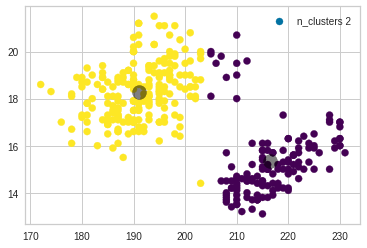

In [ ]:
for i in [2, 3, 4, 5]: # для разного количества кластеров
    # инициализируем и обучим алгоритм k средних
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100)
    
    km.fit(X) # обучим алгоритм k средних
    y = km.predict(X) # выполним разбивку кластеров
    
    # построим диаграмму кластеров, разделяя их по цветам
    plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'bill_depth_mm'], c=y, s=50, cmap='viridis', label='n_clusters '+str(i))
    
    centers = km.cluster_centers_ # получим центры кластеризации

    # добавим в диаграмму центроиды
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    
    plt.legend() # выведем легенду
    plt.show() # выведем диаграмму

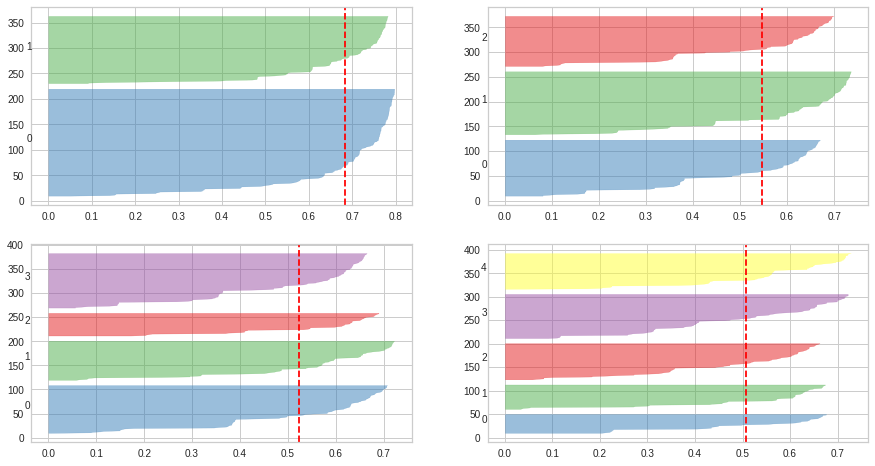

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8)) # подготовим схему расположения 4-х диаграмм
for i in [2, 3, 4, 5]: # для разного количества кластеров
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

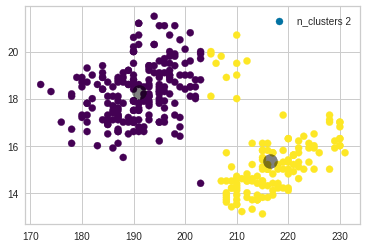

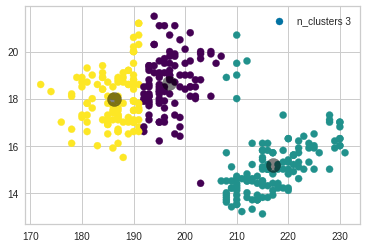

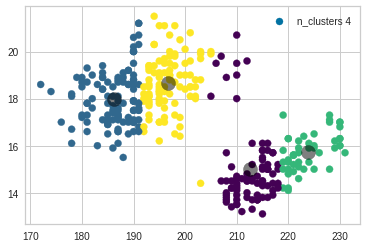

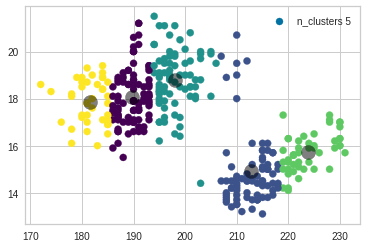

In [ ]:
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, n_init=100, max_iter=900)
    km.fit(X)
    y = km.predict(X)
    plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'bill_depth_mm'], c=y, s=50, cmap='viridis', label="n_clusters "+str(i))
    centers = km.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.legend()
    plt.show()

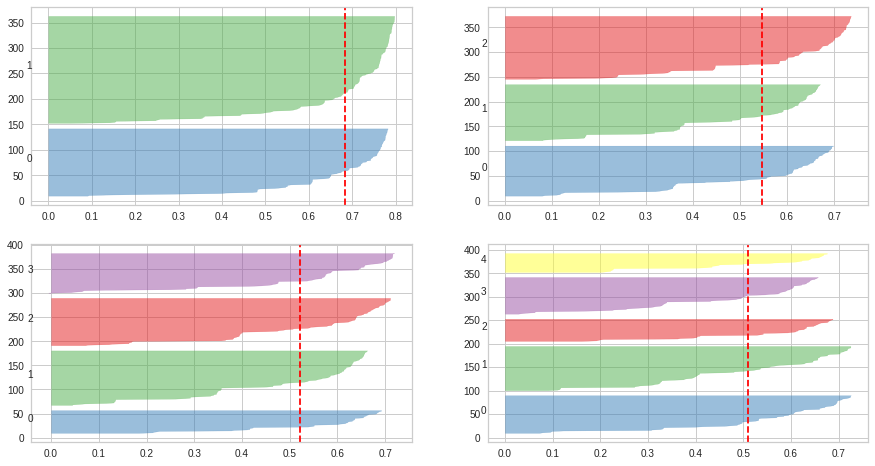

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, n_init=100, max_iter=900)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


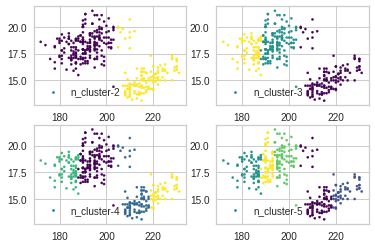

In [ ]:
f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
    aggloclust=AgglomerativeClustering(n_clusters=i).fit(X)
    f.add_subplot(2, 2, i-1)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], s=5, c=aggloclust.labels_, label="n_cluster-"+str(i), cmap='viridis')
    plt.legend()
plt.show()

In [ ]:
for i in [2, 3, 4, 5]:
    pred = AgglomerativeClustering(n_clusters=i).fit_predict(X)
    print(f"silhouette score for AgglomerativeClustering(n_clusters={i})")
    print(silhouette_score(X, pred))

silhouette score for AgglomerativeClustering(n_clusters=2)
0.6823853057247762
silhouette score for AgglomerativeClustering(n_clusters=3)
0.5514101220313637
silhouette score for AgglomerativeClustering(n_clusters=4)
0.5142217900682351
silhouette score for AgglomerativeClustering(n_clusters=5)
0.4818106354190242


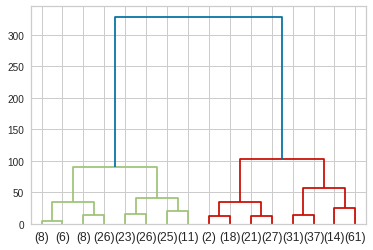

In [ ]:
aggloclust=AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plot_dendrogram(aggloclust, truncate_mode='level', p=3)
# наибольшее расстояние между вертикальными линиями у синей кривой - значит оптимальное количество кластеров = 2

No handles with labels found to put in legend.


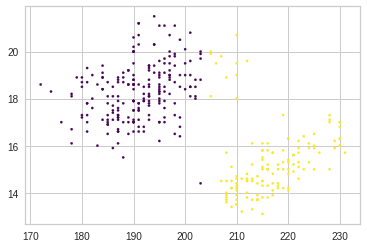

Silhouette score: 0.6823853057247762


In [ ]:
aggloclust=AgglomerativeClustering(n_clusters=2, linkage='average').fit(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=5, c=aggloclust.labels_, cmap='viridis')
plt.legend()
plt.show()
print(f"Silhouette score: {silhouette_score(X, aggloclust.fit_predict(X))}")

No handles with labels found to put in legend.


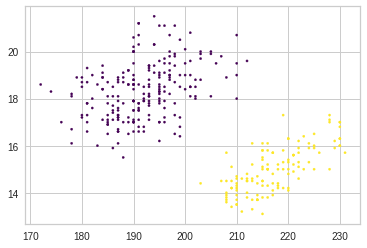

Silhouette score: 0.6566140976933553


In [ ]:
aggloclust=AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='cosine').fit(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=5, c=aggloclust.labels_, cmap='viridis')
plt.legend()
plt.show()
print(f"Silhouette score: {silhouette_score(X, aggloclust.fit_predict(X))}")

In [ ]:
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN eps=0.2, min_samples=5")
plt.show()
print(silhouette_score(X, y_pred))

In [ ]:
db = DBSCAN(eps=2, min_samples=1)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN eps=2, min_samples=1")
plt.show()
print(silhouette_score(X, y_pred))

In [ ]:
db = DBSCAN(eps=2, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN eps=2, min_samples=5")
plt.show()
print(silhouette_score(X, y_pred))

In [ ]:
db = DBSCAN(eps=2, min_samples=15)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN eps=2, min_samples=15")
plt.show()
print(silhouette_score(X, y_pred))

In [ ]:
db = DBSCAN(eps=3, min_samples=1)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN eps=3, min_samples=1")
plt.show()
print(silhouette_score(X, y_pred))